# Course: Deep Learning
# Author: Sandro Camargo sandrocamargo@unipampa.edu.br
# Autoencoder for MNIST

Dataset: '/content/sample_data/' mnist

Dataset description: https://www.tensorflow.org/datasets/catalog/mnist

To open this code in your Google Colab environment, [click here](https://colab.research.google.com/github/Sandrocamargo/deep-learning/blob/master/dl_class09_autoencoder.ipynb).


# Loading libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets

# Loading dataset

In [29]:
#(x_train, _), (x_test, _) = datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Flatten das imagens 28x28 → vetor 784
x_train = x_train.reshape((len(x_train), 784))
x_test  = x_test.reshape((len(x_test), 784))

# Setting autoencoder

In [30]:
encoding_dim = 32  # Dimensão comprimida (redução de 784 → 32)

input_img = layers.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = models.Model(input_img, decoded)

# Também criamos o codificador separadamente (para visualização posterior)
encoder = models.Model(input_img, encoded)

# Compiling and training

In [31]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.3873 - val_loss: 0.1898
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1802 - val_loss: 0.1533
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1493 - val_loss: 0.1345
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1323 - val_loss: 0.1204
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1192 - val_loss: 0.1110
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1108 - val_loss: 0.1049
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1049 - val_loss: 0.1007
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1011 - val_loss: 0.0979
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0985 - val_loss: 0.0959
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0967 - val_loss: 0.0947
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0958 - val_loss: 0.0939
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━

# Viewing loss

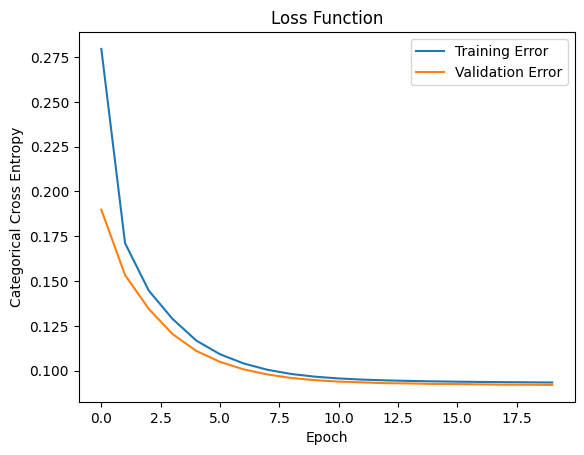

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Training Error','Validation Error'], loc='upper right')
plt.savefig("trainingerror.pdf")
plt.show()

# Viewing results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


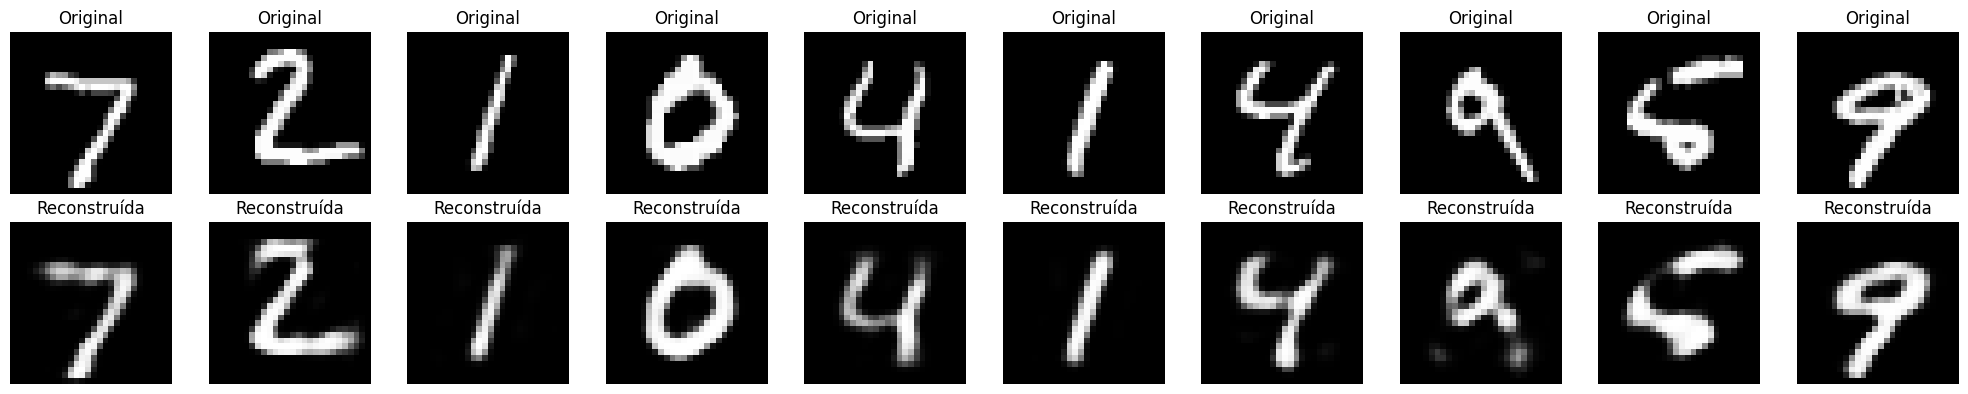

In [32]:
# Codificar e reconstruir
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Mostrar imagens originais e reconstruídas
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstruída")
    plt.axis("off")

plt.tight_layout()
plt.show()


# Viewing bootleneck (latent space)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


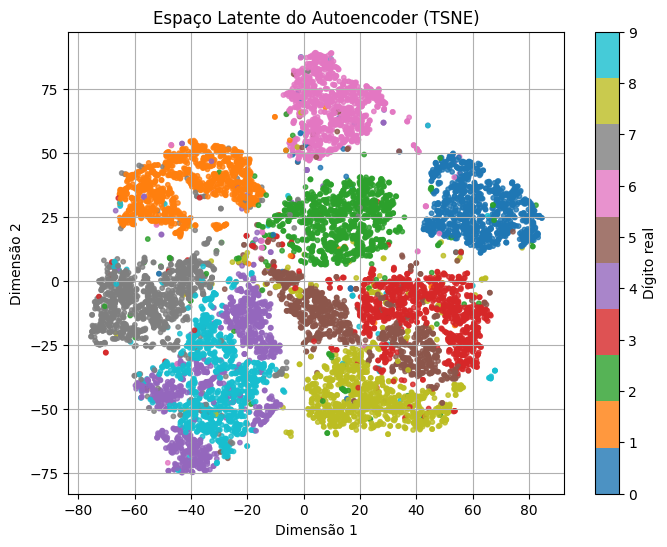

In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ---------------------------------------------------------
# 1️⃣ Gerar embeddings (gargalo)
# ---------------------------------------------------------
encoded_imgs = encoder.predict(x_test)

# ---------------------------------------------------------
# 2️⃣ Reduzir para 2D (PCA ou t-SNE)
# ---------------------------------------------------------
method = "TSNE"  # ou "PCA"

if method == "PCA":
    reducer = PCA(n_components=2)
else:
    reducer = TSNE(n_components=2, random_state=42, perplexity=30)

latent_2d = reducer.fit_transform(encoded_imgs)

# ---------------------------------------------------------
# 3️⃣ Visualizar o espaço latente colorido por rótulo
# ---------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1],
            s=10, c=y_test, cmap='tab10', alpha=0.8)
plt.colorbar(label="Dígito real")
plt.title(f"Espaço Latente do Autoencoder ({method})")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.grid(True)
plt.show()
